In [1]:
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

from rllr.utils.plotting.video import show_video
from rllr.utils.logger import init_logger
from rllr.utils.common import switch_reproducibility_on
from rllr.utils.plotting.display import display_stats

In [3]:
from pyhocon import ConfigFactory

config = ConfigFactory.parse_file('../experiments/conf/minigrid_navigation_mlp_master_worker.hocon')
config['env']['video_path'] = './video/'

In [4]:
switch_reproducibility_on(config['seed'])

# Train worker

In [5]:
from experiments import train_worker
init_logger('experiments.train_worker')

In [6]:
env = train_worker.gen_navigation_env(config['env'])

In [7]:
worker_agent = train_worker.get_agent(config)

2021-04-30 14:07:53,899 INFO    rllr.algo.dqn          : Running on device: cpu


In [8]:
scores, steps = train_worker.run_episodes(env, worker_agent, n_episodes=1000, verbose=100)

2021-04-30 14:08:45,285 INFO    experiments.train_worker   : Episode: 100. scores: -10.38, steps: 112.30, achieved: 0.77
2021-04-30 14:09:16,821 INFO    experiments.train_worker   : Episode: 200. scores: -5.61, steps: 65.84, achieved: 0.89
2021-04-30 14:09:35,766 INFO    experiments.train_worker   : Episode: 300. scores: -2.84, steps: 38.64, achieved: 0.93
2021-04-30 14:09:50,064 INFO    experiments.train_worker   : Episode: 400. scores: -1.83, steps: 28.76, achieved: 0.95
2021-04-30 14:09:58,698 INFO    experiments.train_worker   : Episode: 500. scores: -0.65, steps: 17.21, achieved: 0.97
2021-04-30 14:10:11,857 INFO    experiments.train_worker   : Episode: 600. scores: -1.60, steps: 26.22, achieved: 0.93
2021-04-30 14:10:19,794 INFO    experiments.train_worker   : Episode: 700. scores: -0.50, steps: 15.71, achieved: 0.97
2021-04-30 14:10:25,598 INFO    experiments.train_worker   : Episode: 800. scores: -0.05, steps: 11.55, achieved: 1.00
2021-04-30 14:10:29,648 INFO    experiments.tr

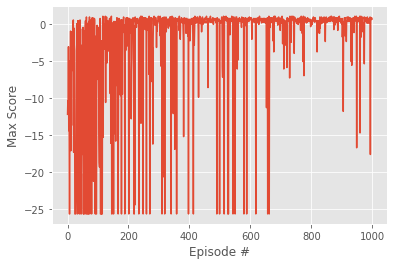

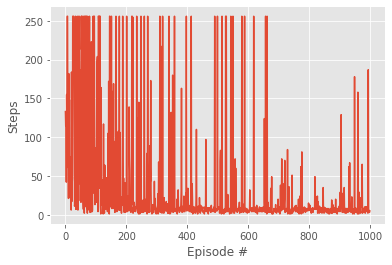

In [9]:
display_stats(scores, steps)

# Train master

In [10]:
from experiments import train_master
init_logger('experiments.train_master')

In [11]:
config = ConfigFactory.parse_file('../experiments/conf/minigrid_navigation_mlp_master_worker.hocon')
del config['env']['goal_achieving_criterion']
del config['env']['goal_type']

In [12]:
emb_size = worker_agent.qnetwork_local.state_encoder.goal_state_encoder.output_size
master_agent = train_master.get_master_agent(emb_size, config)
worker_agent.explore = False

In [13]:
env = train_worker.gen_env(config['env'])

In [14]:
scores, steps = train_master.run_episodes(env, worker_agent, master_agent, n_episodes=1000, verbose=100)

2021-04-30 14:15:20,423 INFO    experiments.train_master   : Episode: 100. scores: 0.00, steps: 256.00
2021-04-30 14:19:58,490 INFO    experiments.train_master   : Episode: 200. scores: 0.00, steps: 256.00
2021-04-30 14:24:31,436 INFO    experiments.train_master   : Episode: 300. scores: 0.00, steps: 256.00
2021-04-30 14:29:13,297 INFO    experiments.train_master   : Episode: 400. scores: 0.00, steps: 256.00
2021-04-30 14:34:02,520 INFO    experiments.train_master   : Episode: 500. scores: 0.00, steps: 256.00
2021-04-30 14:38:58,029 INFO    experiments.train_master   : Episode: 600. scores: 0.00, steps: 256.00
2021-04-30 14:44:03,930 INFO    experiments.train_master   : Episode: 700. scores: 0.00, steps: 256.00
2021-04-30 14:49:21,845 INFO    experiments.train_master   : Episode: 800. scores: 0.00, steps: 256.00
2021-04-30 14:54:51,045 INFO    experiments.train_master   : Episode: 900. scores: 0.00, steps: 256.00
2021-04-30 15:00:33,231 INFO    experiments.train_master   : Episode: 100

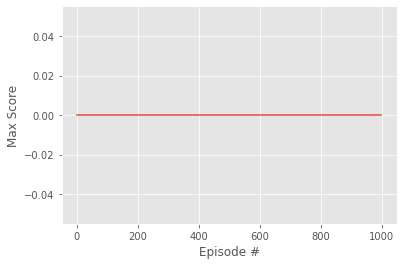

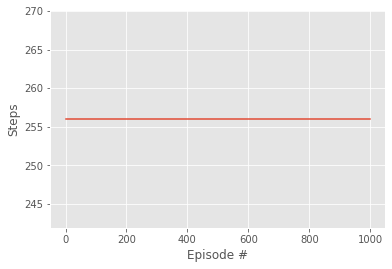

In [15]:
display_stats(scores, steps)